# Predictive Modelling of Subscribers in Minecraft Server

## Introduction
Our data science group has been tasked with addressing one of three questions regarding a Minecraft Server known as “Plaicraft”, hosted by a research group in Computer Science at UBC, which Frank Wood, an associate professor of Computer Science, leads. Their goal is to develop a type of AI, embodied AI, that not only understands speech but can respond and act autonomously within a complex virtual environment. To train their AI, they record the gameplay, speech and key presses of consenting players in their server. In addition, they have provided us with 2 datasets from September 17, 2025, to help us answer one of three questions they had about their data. The information we are provided within the two datasets is the users’ age, name, gender, experience level, total played hours, length of sessions and whether or not they are subscribed to a game-related newsletter. 

Our goal is to answer the question: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?” To answer this, we posed the specific question: “Can a player’s played hours and experience level predict whether they are subscribed to a game-related newsletter?” The newsletter is an important channel for researchers because it allows them to maintain long-term communication with players. However, only a portion of players choose to subscribe, making it useful to understand which characteristics are associated with subscription behaviour. Predicting newsletter subscriptions is valuable for two main reasons. First, it allows the research team to improve recruitment strategies by identifying which types of players are more likely to engage beyond gameplay. Second, it provides insight into player involvement, since a subscription may indicate interest in the project and willingness to participate in future studies. Understanding what factors are associated with subscription can therefore help with planning, communication, and resource allocation.
	
To answer this question, we use the players.csv dataset, which contains information about individual players who have joined the server. The dataset has 7 variables: experience level, total time spent playing on the server, newsletter subscription status, player age, name, and gender, as well as a total of 196 observations (AKA data collected) . It is important to note that some of the data provided is self-reported, thus creating a potential for unreliable reporting or personal biases when defining variables like player skill level.
This problem is treated as a classification task, since subscription has two possible outcomes: subscribed or not subscribed, and is not a quantitative variable. We apply a classification model using total hours played and experience level as predictors to estimate each player's likelihood of registration. Through this analysis, we aim to assess whether these variables contain meaningful information about player engagement and whether they can be used to support data-driven decision-making for future recruitment efforts.


## Methods & Results


In the player.csv data set, each row in the dataset represents a unique player and includes variables related to gameplay behaviour and personal characteristics. For this project, we focus exclusively on player data, as the response variable of interest (newsletter subscription) is recorded once per individual.
The variables we will need for our analysis are:
- Played_hours (dbl): the total amount of time the player spent on the server.
- Experience (chr): a categorical variable describing the player’s experience level.
- Subscribe (lgl): a binary variable indicating whether the player subscribed to the game-related newsletter.

All analyses were conducted using R, with packages from the tidyverse and tidymodels collections.


### Data Reading and Preprocessing
First, the dataset was read into R using a URL, cleaned, and transformed into a format suitable for analysis. Only variables relevant to the research question were selected (experience, subscription, and played_hours). The "experience" variable was converted into a factor to ensure it was treated as a categorical predictor. Observations with missing values ​​in any of the selected variables were removed to ensure that all records used in the modelling contained complete data.



In [1]:
library(tidyverse)
library(tidymodels)

players <- read_csv("https://raw.githubusercontent.com/edoardo-antonucci/Data-Science-Project-Planning-Stage-Individual-/main/players.csv")
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
players_tidy <- players |>
  select(experience, played_hours, subscribe) |>
  mutate(experience = as.factor(experience))

head(players_tidy)

experience,played_hours,subscribe
<fct>,<dbl>,<lgl>
Pro,30.3,TRUE
Veteran,3.8,TRUE
Veteran,0.0,FALSE
Amateur,0.7,TRUE
Regular,0.1,TRUE
Amateur,0.0,TRUE


### Data Summary and Visualizations:
The data was summarized by using the summary function, which provides the variable means and median for the numerical variables, like played hours, and the counts for the categorical and binary variables, like experience and subscription. The summary provided insight into the proportion of the data set that subscribes (true or false). It can be seen that there are far more trues (144) than falses (52), which should be noted as it may cause bias in the prediction model, such as our model predicting true more often than false due to the magnitude of true compared to false.

Two histograms were produced using the ggplot function. Both histograms used the fill argument to distinguish between player subscriptions (true or false), but they differ as the first one presents the distribution of hours played, whereas the second presents the distribution of player skill levels.


In [3]:
players_summary <- summary(players_tidy)
players_summary


    experience  played_hours     subscribe      
 Amateur :63   Min.   :  0.000   Mode :logical  
 Beginner:35   1st Qu.:  0.000   FALSE:52       
 Pro     :14   Median :  0.100   TRUE :144      
 Regular :36   Mean   :  5.846                  
 Veteran :48   3rd Qu.:  0.600                  
               Max.   :223.100                  

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


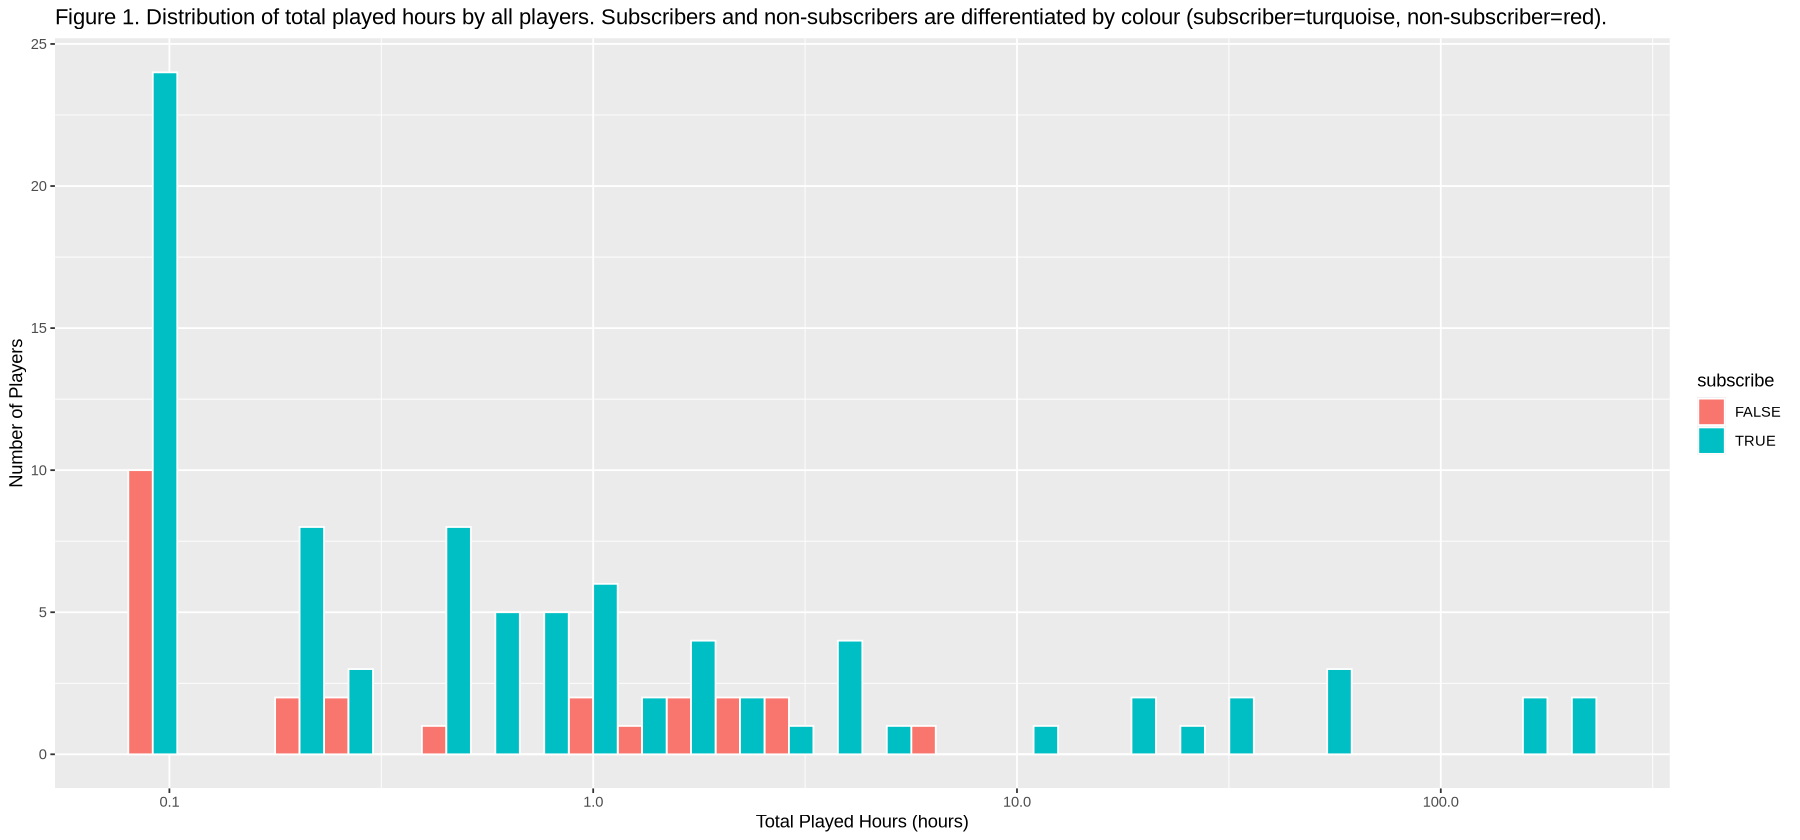

In [4]:
options (repr.plot.width = 15)

# Distribution of Total Played Hours
total_hours_plot <- ggplot(players_tidy, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(color = "white",position = "dodge") +
  scale_x_log10 ()+
  labs(
    title = "Figure 1. Distribution of total played hours by all players. Subscribers and non-subscribers are differentiated by colour (subscriber=turquoise, non-subscriber=red).",
    x = "Total Played Hours (hours)",
    y = "Number of Players", 
    fill = "subscribe"
  )
total_hours_plot

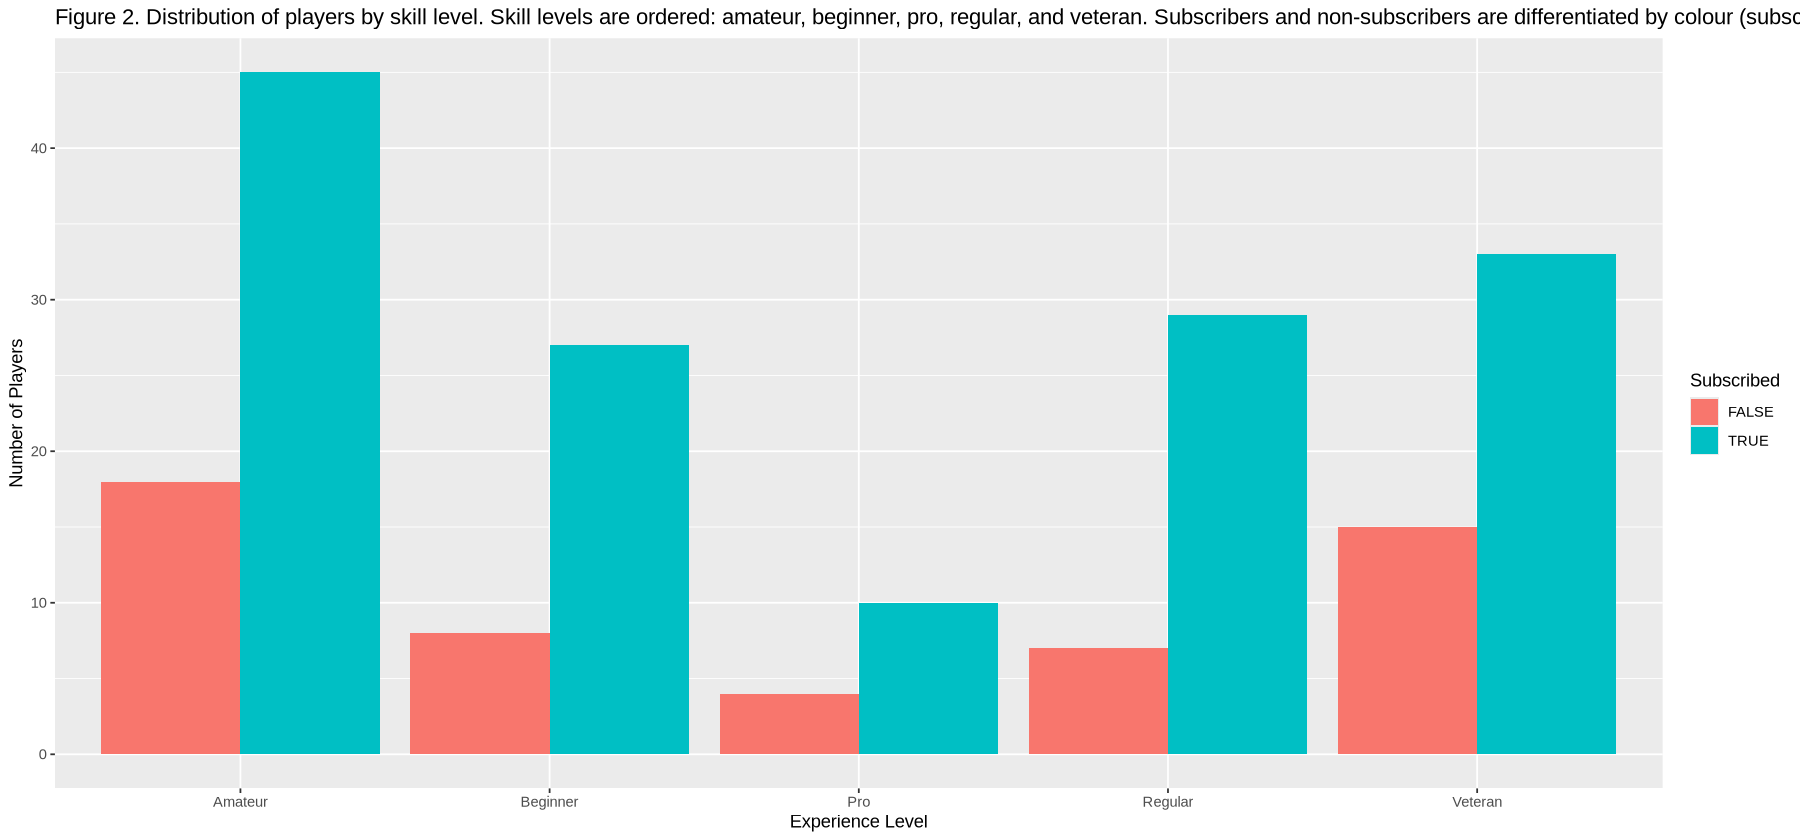

In [5]:
# Subscription status vs Experience Level
ph_vs_ns <- ggplot(players_tidy, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 2. Distribution of players by skill level. Skill levels are ordered: amateur, beginner, pro, regular, and veteran. Subscribers and non-subscribers are differentiated by colour (subscriber=turquoise, non-subscriber=red).",
    x = "Experience Level",
    y = "Number of Players",
    fill = "Subscribed"
  )
ph_vs_ns

### Data Analysis:

	To answer the question of whether skill level and hours played can predict whether a player subscribes, a KNN classification model was created. To begin this process, the code split the data set into 75% training and 25% testing data. Following this, the model for KNN classification was encoded, but the neighbours had not yet been set, as cross-validation would later be conducted to determine the ideal k value for this model.  A recipe was created, and all predictors were centred and scaled to not bias the classification to one predictor or the other. 

	Cross-validation was subsequently performed to determine the ideal k, and the workflow was created to put everything together. A cross-validation plot was created to visually choose the optimal k, which was determined to be k=11. This was chosen, as it provided the peak accuracy, prior to the plateau in the graph. This would indicate that the values after k=11 would be underfitting. 

	After the determination of k, the classification model was adjusted to now use 11 neighbours, and a new workflow was created to fit the training data. Next, the model was tested on the testing data, and the accuracy was found to be 80%, the precision was found to be 79%, and the recall was found to be 100 %.


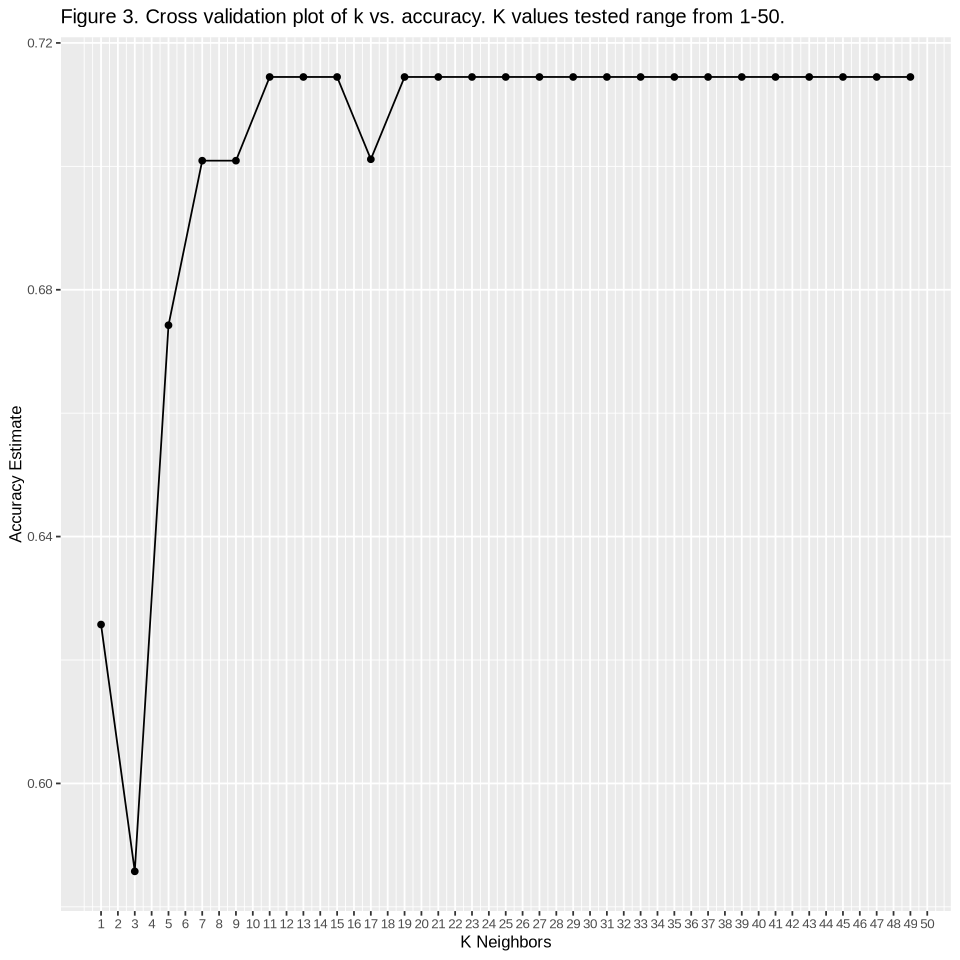

In [6]:
set.seed(1) 
library(tidymodels)

players_tidy <- players_tidy |>
mutate(subscribe = as_factor(subscribe))


initial_split <- initial_split(players_tidy, prop = 0.75)
training_data <- training(initial_split)
testing_data <- testing(initial_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_recipe <- recipe(subscribe ~ played_hours + experience, data = training_data) |>
step_dummy(experience) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

players_vfold <- vfold_cv(training_data, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

players_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- players_results |>
    filter(.metric == "accuracy")

options(repr.plot.width=8, repr.plot.height=8)

cross_val_plot <- ggplot(accuracies, aes(x=neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous (breaks = seq ( 1, 50, by = 1)) + 
    labs(x="K Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 3. Cross validation plot of k vs. accuracy. K values tested range from 1-50.") +
    theme(text = element_text(size = 10))

cross_val_plot

In [7]:
# As we can see, the best K-nearest neighbor we found using our cross-validation is 11.
# Now let's adjust our classification using our newfound neighbor!

players_spec_neighbour <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
set_engine("kknn") |>
set_mode("classification")

players_new_result <- workflow() |>
add_model(players_spec_neighbour) |>
add_recipe(players_recipe) |>
fit(training_data)

In [8]:
# Now that we have our classification workflow, let's see how well it predicts on our testing data!

predictions <- predict(players_new_result, testing_data) |>
bind_cols(testing_data)

# Let's see what the dataset looks like:

pred_metrics <- predictions |>
metrics(truth = subscribe, estimate = .pred_class) |>
filter(.metric == "accuracy")

predictions
pred_metrics

.pred_class,experience,played_hours,subscribe
<fct>,<fct>,<dbl>,<fct>
TRUE,Veteran,0.0,FALSE
TRUE,Amateur,0.7,TRUE
TRUE,Regular,0.1,TRUE
TRUE,Amateur,0.0,TRUE
TRUE,Amateur,0.0,FALSE
TRUE,Amateur,0.1,TRUE
TRUE,Veteran,1.6,TRUE
TRUE,Pro,0.0,TRUE
TRUE,Amateur,48.4,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7959184


In [9]:
# An accuracy of 79% is not bad, though from the table above, we can see that the classifier classified everything as True.
# This could be an issue since we are trying to predict if hours played and experience contribute to a player being subscribed to a
# game-related newsletter, and if the classifier always classifies a player as guaranteed to be subscribed to a game-related newsletter,
# It could produce false positives, as shown in the dataset above.

# Let's look at the confusion matrix metrics:

players_conf_mat <- predictions |>
conf_mat(truth = subscribe, estimate = .pred_class)

players_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     10   39

Let our **Positive Case** be TRUE

|                  |          |  Actual Values |                |
|:----------------:|----------|:--------------:|:--------------:|
|                  |          |    Negative    |    Positive    |
|**Predicted Value**  | Negative |  True Negative | False Negative|
|                  | Positive | False Positive | True Positive  |


- A **true negative** is an outcome where the model correctly predicts the negative class.
- A **true Positive** is an outcome where the model correctly predicts the negative class.
- A **false negative** is an outcome where the model incorrectly predicts the negative class.
- A **false Positive** is an outcome where the model incorrectly predicts the negative class.

#### From our confusion matrix, let's calculate the **Precision** and **Recall** of our classification algorithm.

**Precision:** Measures the accuracy of our positive predictions. In other words, of the total positive cases, how many were actually positive?

The formula is:
Precision = True Positive / (False Positive + True Positive)

**Recall:** Measures the model's ability to find all positive instances. In other words, how many True positives did the model identify out of all positive cases?


The formula is:
Recall = True Positive / (False Negative + True Positive)

In [10]:
precision <- round(31 / ( 10 + 31 ), 2)
precision

recall <- round(39 / 39,2)
recall

[1] 0.76

[1] 1

### Discussion
We expected to see that individuals with a more advanced reported experience level and more played hours would lead to increased subscriptions to the newsletter.


In Figure 1, we are trying to see if there is a correlation between a player's total played hours and whether or not they are subscribed. With this visualization, we expected to see that as a player's total played hours grow, the likelihood of their subscription grows as well. As we can see in the visualization above, the ratio of players who are subscribed and those who are not is biased towards true across most played hours. Near the end of the bar graph, as played hours pass the 10-hour mark, we see that all players are subscribed to the game-related newsletter, indicating that there is a relationship, and that played_hours is a variable that is worth including as a predictor in our classification model. One thing to mention about the data, we see that the highest number of subscribers is found with individuals who played the least amount of hours (0.1hours). One conclusion to be made from this is that less experienced players are subscribing to become more engaged and better. 


In Figure 2, we are looking at how many players are subscribed based on self-reported experience levels. Although in all 5 categories (amateur, beginner, pro, regular, veteran) the ratio of players subscribed to not subscribed is high, we see the highest ratios in amateur and regular players. With this data, we can say that this variable is a good indicator of whether a player will be subscribed to the newsletter or not. The highest number of subscribers was seen to be in the amateur grouping, and the lowest amount was in the pro group. This correlates with what we mentioned above for Figure 1, as the lowest played hours were represented with the highest number of subscribers. Our reasoning for this was that less experienced players who do not play as much are subscribing to become more experienced and involved. 


Figure 3 is our accuracy measurements based on the k neighbours from the cross-validation we conducted. From this graph, we were able to pick our best k, which is k=11. We chose this because our highest accuracy was at k=11. We confirmed that this was the highest K value we would get by extending our range to observe the plateau. From this graph, we were able to update our model with our new k to determine precision and accuracy.


After applying the KNN classification model, the precision of 79%, the accuracy of 80% and the recall of 100%, indicating a relatively good model. For this study, the values are acceptable as these findings are not observed in a high-stakes environment. One should note that in Table 1, we see that our classifier identified everything as true, likely due to the bias discussed in the data description section.


Subscription to the newsletter is a major avenue for researchers to be able to have more communication with subscribers and be able to have more participants in future studies. Knowing the likelihood of which players will subscribe can help create targeted marketing efforts towards less experienced players who may not otherwise have subscribed. With more newsletter subscribers, they will have more communication avenues to achieve their overall goal of developing a more in-depth AI program to observe and study players. This could lead to another very important question: How effective is the newsletter as a form of engagement with players, and does it improve player retention?

